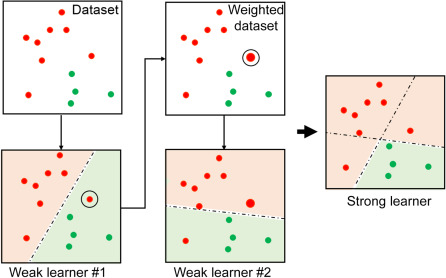

In [1]:
from IPython.display import Image

Image(filename="Lesson21-adaboost.jpg")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings #ignore warning

import os

In [3]:
train = pd.read_csv("Lesson21-titanic_train.csv")
test = pd.read_csv("Lesson21-titanic_test.csv")

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
%%HTML
<div class='tableauPlaceholder' id='viz1516349898238' style='position: relative'><noscript><a href='#'><img alt='An Overview of Titanic Training Dataset ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic_data_mining&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic_data_mining&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1516349898238');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
def missing_pct(df):
    missing_count = df.isna().sum().sort_values(ascending = False)
    percent = round(missing_count/len(df)*100,2)
    return pd.concat([missing_count,percent],axis=1,keys=["Missing_count","Percent"])

In [9]:
missing_pct(train)

,Missing_count,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00


In [10]:
missing_pct(test)

,Missing_count,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24
Name,0,0.00
Pclass,0,0.00
PassengerId,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00
Ticket,0,0.00


In [11]:
def percent_value_counts(df,feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2))

    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ["Percent"]
    return pd.concat([total, percent],axis=1)


In [12]:
percent_value_counts(train,"Embarked")

,Total,Percent
Embarked,,
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


In [13]:
train[train.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### both missing with Fare = 80.0 and are Pclass1 and Female. 
#### next is to see how the Fare is distributed among all Pclass and Embarded feature values

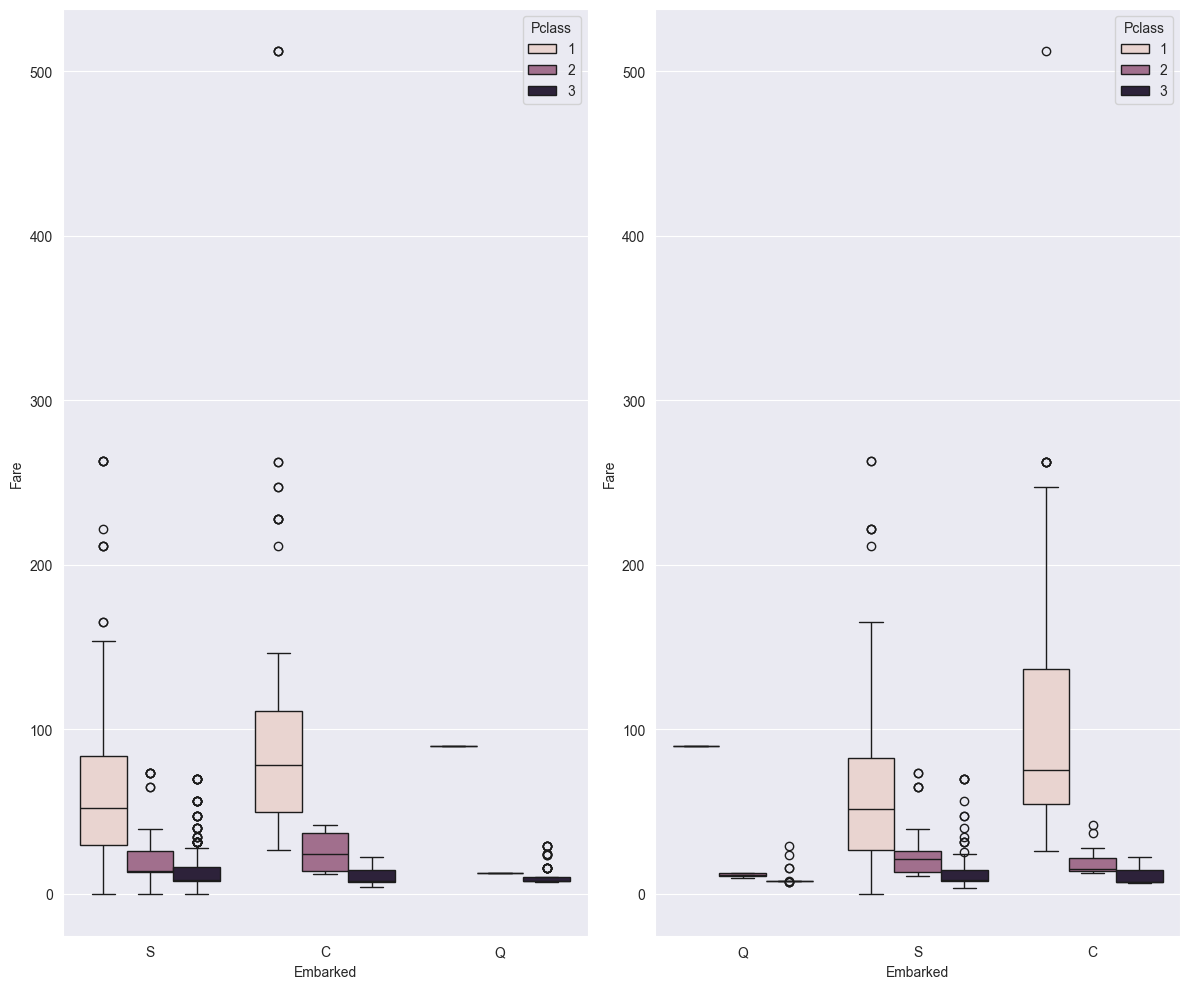

In [14]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))

plt.subplot(1,2,1)
sns.boxplot(x="Embarked",y="Fare",hue="Pclass",data=train)

plt.subplot(1,2,2)
sns.boxplot(x="Embarked",y="Fare",hue="Pclass",data=test)

plt.tight_layout()

In [15]:
train.Embarked.fillna("C", inplace=True)

C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\1898946695.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.Embarked.fillna("C", inplace=True)


In [16]:
train.Cabin.isna().sum()

np.int64(687)

In [17]:
len(train.Cabin)

891

In [18]:
train.Cabin.isna().sum()/(len(train.Cabin)) #missing percentage for Cabin

np.float64(0.7710437710437711)

In [19]:
survivers = train.Survived

train.drop(["Survived"],axis=1,inplace=True)

all_data = pd.concat([train,test],ignore_index=False)

all_data.Cabin.fillna("N",inplace=True)

C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\3558817887.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data.Cabin.fillna("N",inplace=True)


In [20]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,N,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,N,S


In [21]:
all_data.Cabin.value_counts()

Cabin
N                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
C39                   1
B24                   1
D40                   1
D38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [22]:
all_data.Cabin = [i[0] for i in all_data.Cabin]
all_data.Cabin

0      N
1      C
2      N
3      C
4      N
      ..
413    N
414    C
415    N
416    N
417    N
Name: Cabin, Length: 1309, dtype: object

In [23]:
percent_value_counts(all_data,"Cabin")

,Total,Percent
Cabin,,
N,1014,77.46
C,94,7.18
B,65,4.97
D,46,3.51
E,41,3.13
A,22,1.68
F,21,1.60
G,5,0.38
T,1,0.08


In [24]:
all_data.groupby("Cabin")["Fare"].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [25]:
def cabin_estimator(i):
    a = 0
    if i<16:
        a="G"
    elif 16<=i<38:
        a="F"
    elif 38<=i<47:
        a="A"
    elif 47<=i<53:
        a="D"
    elif 53<=i<54:
        a="E"
    elif 54<=i<116:
        a="C"
    else:
        a="B" 
    return a 

In [26]:
with_N = all_data[all_data.Cabin=="N"]
without_N = all_data[all_data.Cabin != "N"]

In [27]:
with_N

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,N,Q
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,N,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,N,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,N,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,N,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,N,S


In [28]:
with_N.Cabin = with_N.Fare.apply(lambda x:cabin_estimator(x))

with_N.Cabin

C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\2013005794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  with_N.Cabin = with_N.Fare.apply(lambda x:cabin_estimator(x))


0      G
2      G
4      G
5      G
7      F
      ..
412    G
413    G
415    G
416    G
417    F
Name: Cabin, Length: 1014, dtype: object

In [29]:
all_data = pd.concat([with_N,without_N],axis=0)

all_data.sort_values(by="PassengerId",inplace=True)

train = all_data[:891]
test = all_data[891:]

In [30]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,G,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,G,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,G,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,F,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C


In [31]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [32]:
train["Survived"] = survivers #adding saved target variable with train

C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\1298955846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Survived"] = survivers #adding saved target variable with train


In [33]:

train[train.Fare.isna()]

test[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,B,S


In [34]:
test[(test.Pclass==3) & (test.Sex == "male") & (test.Embarked == "S")].Fare

3       8.6625
5       9.2250
9      24.1500
10      7.8958
21      3.1708
        ...   
394    22.0250
398     7.7750
413     8.0500
415     7.2500
416     8.0500
Name: Fare, Length: 101, dtype: float64

In [35]:
missing_value = test[(test.Pclass==3) & (test.Sex == "male") & (test.Embarked == "S")].Fare.mean()

In [36]:
missing_value

np.float64(12.718872000000001)

In [37]:
test.Fare.fillna(missing_value,inplace=True)

C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\3659018117.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test.Fare.fillna(missing_value,inplace=True)
C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\3659018117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Fare.fillna(missing_value,inplace=True)


In [38]:
test.loc[test.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<Axes: >

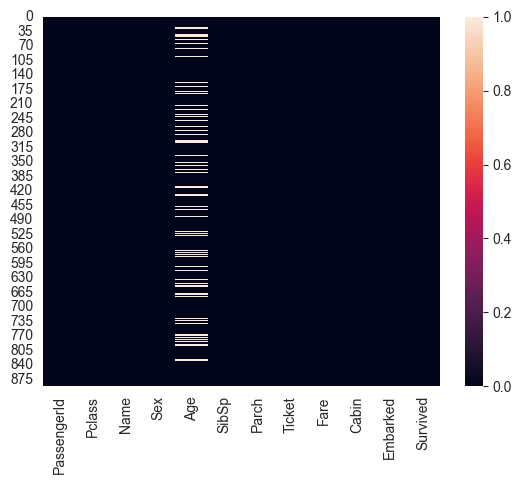

In [39]:
sns.heatmap(train.isna())

<Axes: >

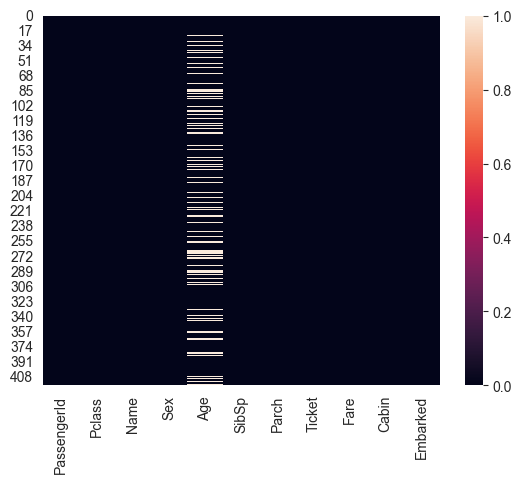

In [40]:
sns.heatmap(test.isna())

In [41]:
train.Age.isna().sum()/len(train) # a percentage 

np.float64(0.19865319865319866)

<Axes: xlabel='Sex', ylabel='Survived'>

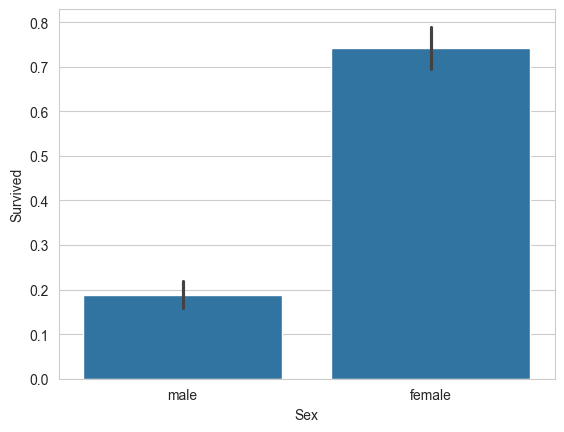

In [42]:
sns.set_style("whitegrid")

sns.barplot(x="Sex",y="Survived",data=train)

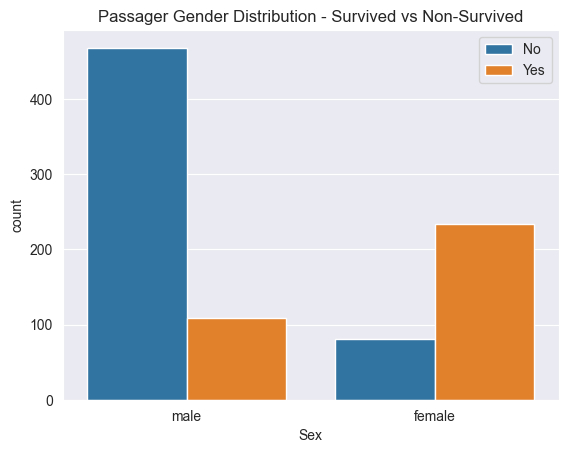

In [43]:
sns.set_style("darkgrid")
label = {0:"No",1:"Yes"}
sns.countplot(x="Sex",hue="Survived",data=train)
plt.legend(["No","Yes"])
plt.title("Passager Gender Distribution - Survived vs Non-Survived")
plt.show()

([<matplotlib.axis.XTick at 0x25b75edc050>,
 [Text(0, 0, 'upper'), Text(1, 0, 'middle'), Text(2, 0, 'lower')])

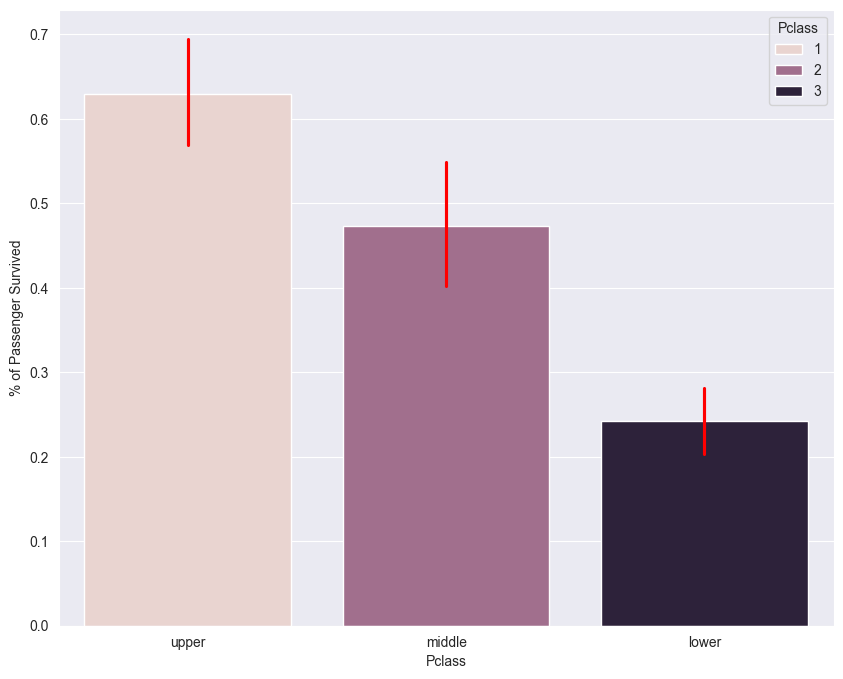

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x="Pclass",y="Survived",hue="Pclass", data=train,err_kws={'color': 'red'})

names = ("upper","middle","lower")

plt.ylabel("% of Passenger Survived")
val = [0,1,2]
plt.xticks(val,names)

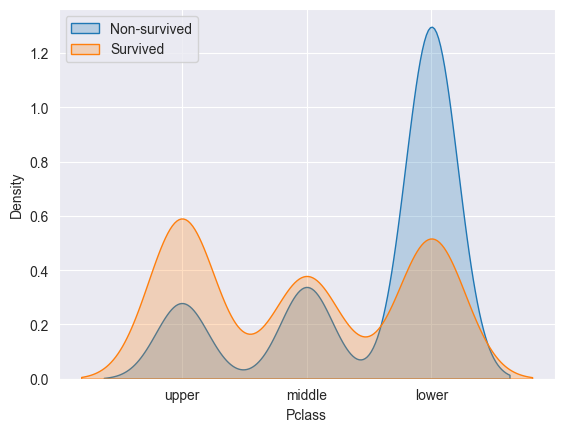

In [45]:
sns.kdeplot(train.Pclass[train.Survived == 0], fill=True,label="Non-survived")

sns.kdeplot(train.Pclass[train.Survived == 1],fill=True,label="Survived")

names= ["upper","middle","lower"]
plt.xticks(sorted(train.Pclass.unique()),names)

plt.legend()

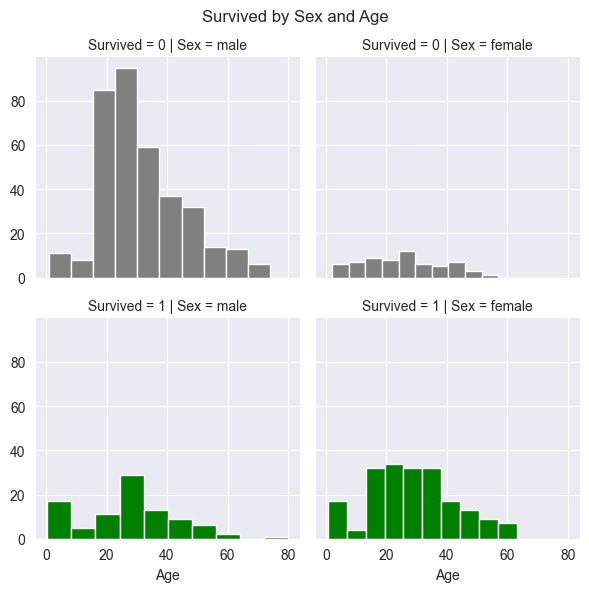

In [46]:

pal = {1:"green",0:"gray"}
g=sns.FacetGrid(train,col="Sex",row="Survived",hue="Survived",palette=pal)
g.map(plt.hist,"Age",edgecolor="white")
g.fig.suptitle("Survived by Sex and Age")   #Add a centered super title to the figure
plt.subplots_adjust(top=0.9)

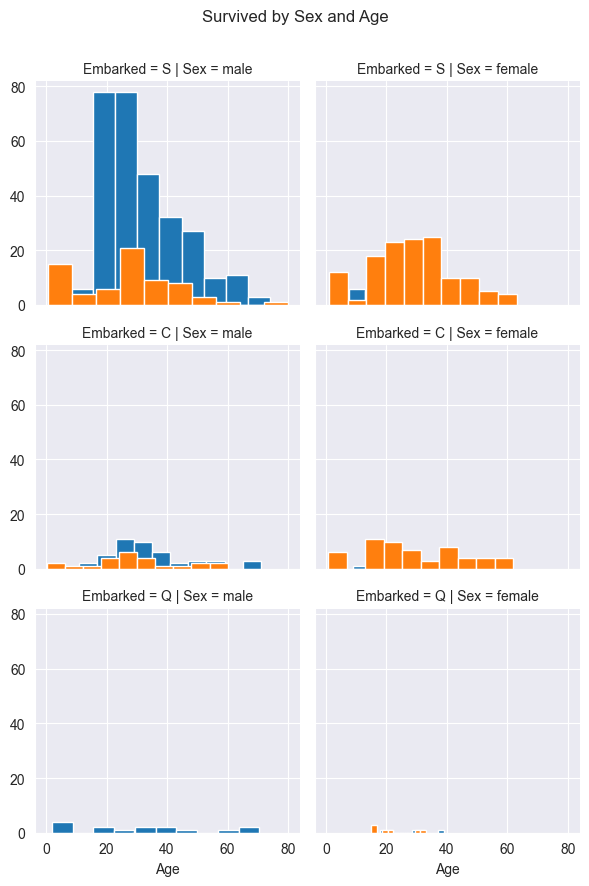

In [47]:

pal = {1:"green",0:"gray"}
g=sns.FacetGrid(train,col="Sex",row="Embarked",hue="Survived")
g.map(plt.hist,"Age",edgecolor="white")
g.fig.suptitle("Survived by Sex and Age")   #Add a centered super title to the figure
plt.subplots_adjust(top=0.9)

In [48]:
# placing 0 for female and 1 for male

train["Sex"] = train.Sex.apply(lambda x:0 if x=="female" else 1)
test["Sex"] = test.Sex.apply(lambda x:0 if x=="female" else 1)

C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\3948772746.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Sex"] = train.Sex.apply(lambda x:0 if x=="female" else 1)
C:\Users\ziton\AppData\Local\Temp\ipykernel_16844\3948772746.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Sex"] = test.Sex.apply(lambda x:0 if x=="female" else 1)


In [49]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


In [51]:
survived_summary = train.groupby("Survived")[["Age","Fare"]].agg(["mean","median"])
survived_summary

Age              Fare       
               mean median       mean median
Survived                                    
0         30.626179   28.0  22.117887   10.5
1         28.343690   28.0  48.395408   26.0

In [52]:
survived_summary = train.groupby("Pclass")["Fare"].mean()
survived_summary.reset_index()

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


In [54]:
num_train = train.select_dtypes(exclude="object")
pd.DataFrame(abs(num_train.corr()["Survived"]).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.543351
Pclass,0.338481
Fare,0.257307
Parch,0.081629
Age,0.077221
SibSp,0.035322
PassengerId,0.005007


<Axes: >

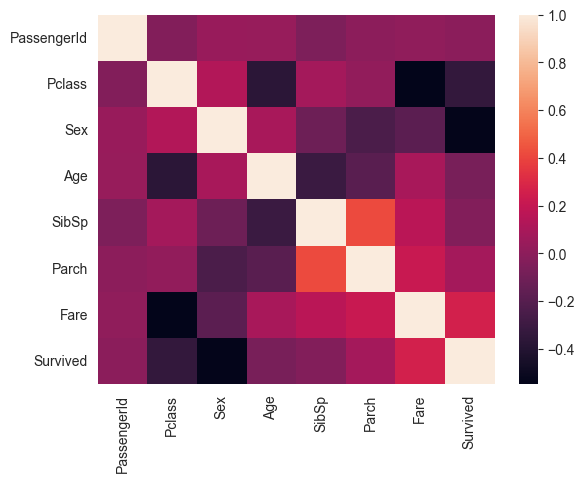

In [55]:
sns.heatmap(num_train.corr())

In [56]:
train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C,C,1


### RandomForestRegressor to predict and fill N/A Age

In [57]:
train.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,G,S,1


In [58]:
from sklearn.ensemble import RandomForestRegressor

def completing_age(df):
    age_df = df.loc[:,["Age","SibSp","Parch","Fare","Pclass","Sex"]]
    temp_train = age_df.loc[age_df.Age.notnull()] #df with age values
    temp_test = age_df[age_df.Age.isnull()]  #df without age values

    y = temp_train.Age.values 
    x = temp_train.loc[:,["SibSp","Parch","Fare","Pclass","Sex"]].values

    rfr = RandomForestRegressor(n_estimators=1500,n_jobs=-1)
    rfr.fit(x,y)

    predict_age = rfr.predict(temp_test.loc[:,["SibSp","Parch","Fare","Pclass","Sex"]])

    df.loc[df.Age.isnull(),"Age"] = predict_age

    return df
    
    

In [59]:
completing_age(train)

C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,G,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,G,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,G,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,G,S,0
887,888,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,16.436811,1,2,W./C. 6607,23.4500,F,S,0
889,890,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C,C,1


In [60]:
completing_age(test)

C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,G,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,G,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,G,Q
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,G,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,G,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,26.692762,0,0,A.5. 3236,8.0500,G,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,C,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,G,S
416,1308,3,"Ware, Mr. Frederick",1,26.692762,0,0,359309,8.0500,G,S


In [61]:
train.Age.mean()

np.float64(29.61903562374708)

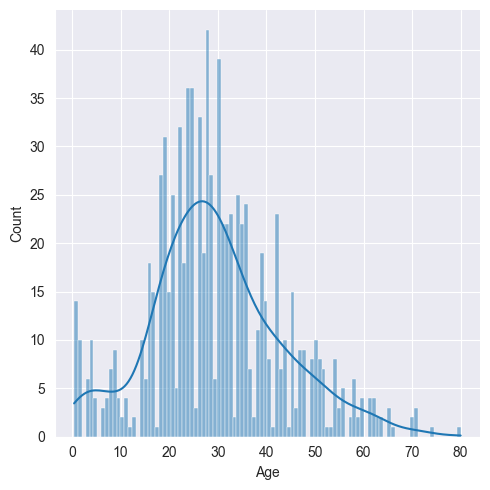

In [62]:
# plt.figure(figsize=(15,8))
sns.displot(train.Age,bins=100,kde=True)
plt.tight_layout()

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


In [64]:
df_encoded = pd.get_dummies(train["Embarked"],dtype=int,drop_first=True)

In [65]:
df_encoded

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [66]:
train = train.select_dtypes(exclude="object")
train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,1
3,4,1,0,35.000000,1,0,53.1000,1
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,1
888,889,3,0,16.436811,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.2+ KB


In [68]:
df_encoded_test = pd.get_dummies(test["Embarked"],dtype=int,drop_first=True)

test = test.select_dtypes(exclude="object")

test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,1,34.500000,0,0,7.8292
1,893,3,0,47.000000,1,0,7.0000
2,894,2,1,62.000000,0,0,9.6875
3,895,3,1,27.000000,0,0,8.6625
4,896,3,0,22.000000,1,1,12.2875
...,...,...,...,...,...,...,...
413,1305,3,1,26.692762,0,0,8.0500
414,1306,1,0,39.000000,0,0,108.9000
415,1307,3,1,38.500000,0,0,7.2500
416,1308,3,1,26.692762,0,0,8.0500


In [69]:
train = pd.concat([train,df_encoded],axis=1)
test=pd.concat([test,df_encoded_test],axis=1)

In [70]:
X = train.drop(["Survived"],axis=1)
y=train["Survived"]

In [71]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state=0)

In [72]:
len(x_train)

headers = X.columns

In [73]:
len(x_test)

295

In [74]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler()

x_train = std_scale.fit_transform(x_train)

x_test = std_scale.transform(x_test)

## tranform the testset
# test = st_scale.transform(test)

In [75]:
pd.DataFrame(x_train,columns=headers).head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,-0.796817,-0.343632,0.724083,-0.049599,-0.455235,-0.469509,-0.455103,-0.315644,0.603195
1,-0.401013,-0.343632,0.724083,0.465240,-0.455235,-0.469509,-0.403337,-0.315644,0.603195
2,-1.076208,-1.534356,0.724083,2.303950,-0.455235,-0.469509,0.021148,-0.315644,0.603195
3,-1.010241,-1.534356,0.724083,1.127175,-0.455235,-0.469509,-0.122762,-0.315644,0.603195
4,1.368465,-0.343632,0.724083,0.318143,-0.455235,-0.469509,-0.403337,-0.315644,0.603195


## LogisticRegression Model

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,accuracy_score

logreg = LogisticRegression(solver="liblinear",random_state=42)

logreg.fit(x_train,y_train)

y_pred = logreg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1])

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

confusion_matrix(y_test,y_pred)

array([[155,  29],
       [ 33,  78]])

In [78]:
pd.DataFrame(confusion_matrix(y_test,y_pred), columns = ["Predicted Not-Survived","Predicted Survived"],index = ["Not-Survived","Survived"])

,Predicted Not-Survived,Predicted Survived
Not-Survived,155,29
Survived,33,78


In [79]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, balanced_accuracy_score

accuracy_score(y_test,y_pred)

0.7898305084745763

In [80]:
recall_score(y_test,y_pred)

0.7027027027027027

In [81]:
precision_score(y_test,y_pred)

0.7289719626168224

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       184
           1       0.73      0.70      0.72       111

    accuracy                           0.79       295
   macro avg       0.78      0.77      0.77       295
weighted avg       0.79      0.79      0.79       295



In [83]:
from sklearn.metrics import roc_curve,auc 

y_score = logreg.decision_function(x_test)

FPR,TPR,_ = roc_curve(y_test,y_score)
ROC_AUC = auc(FPR,TPR)
print(ROC_AUC)

0.8471895808852331


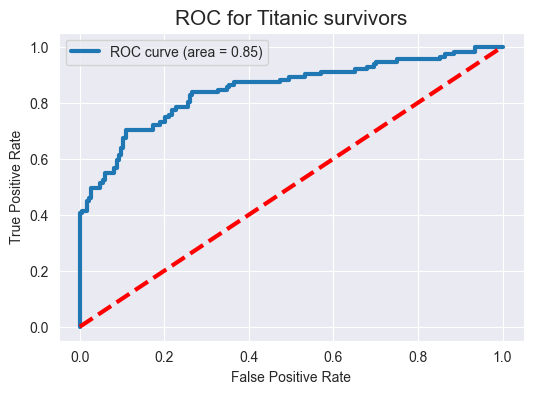

In [84]:
plt.figure(figsize=(6,4))
plt.plot(FPR,TPR,label = "ROC curve (area = %0.2f)"%ROC_AUC,linewidth=3)
plt.plot([0,1],[0,1],"r--",linewidth=3)
plt.xlabel("False Positive Rate",fontsize = 10)
plt.ylabel("True Positive Rate", fontsize = 10)
plt.title("ROC for Titanic survivors", fontsize=15)
plt.legend()
plt.show()

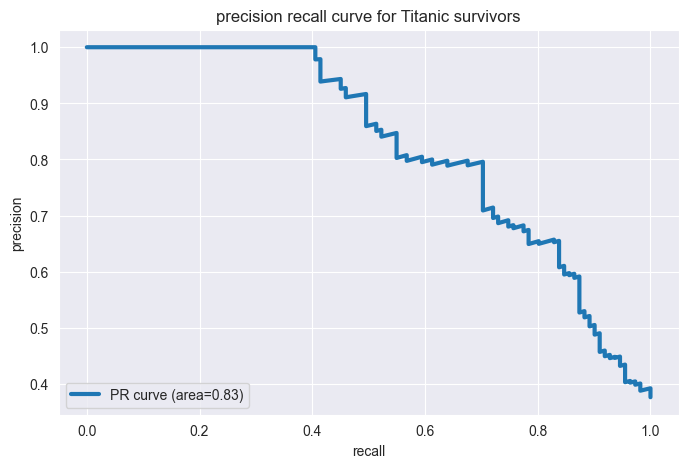

In [85]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(x_test)

precision,recall,_ = precision_recall_curve(y_test,y_score)
PR_AUC = auc(recall, precision) 

plt.figure(figsize=(8,5))
plt.plot(recall, precision, label = "PR curve (area=%0.2f)"%PR_AUC, linewidth = 3)
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("precision recall curve for Titanic survivors")
plt.legend(loc = "lower left")
plt.show()

# Decision Tree Model

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit
max_depth = range(1,10)
max_feature = [2,3,4,5,6,7,8,9,"auto"]
criterion = ["entropy","gini"]

param = {
    "max_depth":max_depth,"max_features":max_feature,"criterion":criterion
}

grid = GridSearchCV(DecisionTreeClassifier(),param_grid = param, verbose=False, cv=StratifiedShuffleSplit(n_splits=6,random_state=15),n_jobs=-1)

grid.fit(X,y)

C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
108 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
76 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ziton\PycharmProjects\PythonProject\PythonProject\.venv\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['entropy', 'gini'], 'max_depth': range(1, 10), 'max_features': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate

In [87]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 5}
0.8333333333333334
DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=5)


In [88]:
dectree_grid = grid.best_estimator_

dectree_grid.score(X,y)

0.8271604938271605

## RandomForest model

In [89]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold,StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier 
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ["gini","entropy"];
cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3,random_state=15)

parameters = {"n_estimators":n_estimators,"max_depth":max_depth, "criterion":criterions}

grid = GridSearchCV(estimator = RandomForestClassifier(max_features=5),param_grid=parameters,cv=cv,n_jobs=-1)

grid.fit(X,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ax_features=5)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10), 'n_estimators': [140, 145, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter

In [90]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.833955223880597
{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 140}
RandomForestClassifier(criterion='entropy', max_depth=8, max_features=5,
                       n_estimators=140)


In [91]:
rf_grid = grid.best_estimator_
rf_grid.score(X,y)

0.9248035914702581

## AdaBoost model

In [92]:
from sklearn.ensemble import AdaBoostClassifier 

adaBoost = AdaBoostClassifier(estimator = None,learning_rate=1,n_estimators = 100)

adaBoost.fit(x_train, y_train)
y_pred = adaBoost.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8067796610169492

In [93]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

n_estimators = [80,110,140,150,160,170,190,200]
cv = StratifiedShuffleSplit(n_splits=10,test_size=0.3,random_state=15)
learning_r = [0.1,1,0.01,0.5]

parameters = {"n_estimators":n_estimators,"learning_rate":learning_r}

grid = GridSearchCV(AdaBoostClassifier(estimator = None),param_grid = parameters, cv=cv,n_jobs=-1)

grid.fit(X,y)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",AdaBoostClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.1, 1, ...], 'n_estimators': [80, 110, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",StratifiedShu...ain_size=None)
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score

In [94]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8093283582089553
{'learning_rate': 1, 'n_estimators': 140}
AdaBoostClassifier(learning_rate=1, n_estimators=140)


In [95]:
ada_grid = grid.best_estimator_
ada_grid.score(X,y)

0.8215488215488216